# Image Compression vis that SVD
## Source:
Steve Brunton [Python] (2020, Feb 2). SVD: Image Compression [Video]. YouTube. [https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6
](https://youtu.be/H7qMMudo3e8?si=Ob8h9Y0FSBJ_uN-P)

## 📝 Video Notes
**Rank-$r$ approximation of $\bold{X}$**:
$$\bold{X} \approx \bold{U}_r\bold{\Sigma}_r\bold{V}_r^T $$

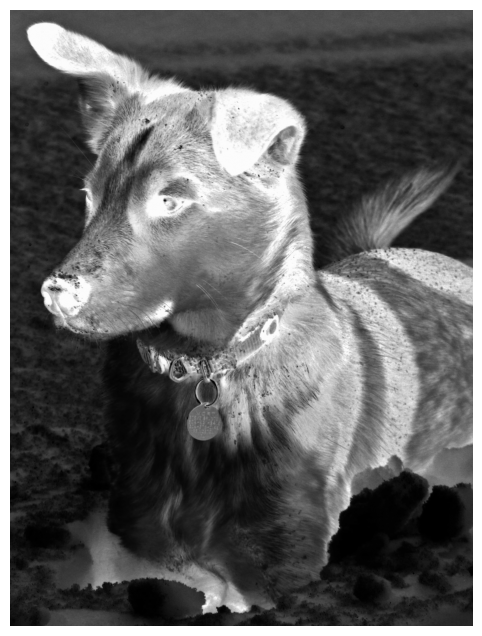

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt 
import numpy as np 
import os 
plt.rcParams['figure.figsize'] = [16, 8]

image = '/workspaces/steve-brunton-book/data/dog.jpg'
A = imread(image)
X = np.mean(A, -1); # convert RGB to grayscale

im = plt.imshow(256-X)
im.set_cmap('gray')
plt.axis('off')
plt.show()